In [12]:
import requests
import json
import chardet
import re
from pprint import pprint


In [13]:
# 1.根据bvid请求得到cid

def get_cid():
    url = 'https://api.bilibili.com/x/player/pagelist?bvid=BV1MN4y177PB'
    res = requests.get(url).text
    json_dict = json.loads(res)
    pprint(json_dict)
    return json_dict["data"][0]["cid"]
cid = get_cid()
print(cid)



{'code': 0,
 'data': [{'cid': 783037295,
           'dimension': {'height': 1080, 'rotate': 0, 'width': 1920},
           'duration': 688,
           'first_frame': 'http://i0.hdslb.com/bfs/storyff/n220724a23lei8ykkbd5bxhmzwye2gcu_firsti.jpg',
           'from': 'vupload',
           'page': 1,
           'part': '回村三天，二舅治好了我的精神内耗',
           'vid': '',
           'weblink': ''}],
 'message': '0',
 'ttl': 1}
783037295


In [23]:
# 2.根据cid请求弹幕，解析弹幕得到最终的数据

def get_data(cid):
    final_url = "https://api.bilibili.com/x/v1/dm/list.so?oid=" + str(cid)
    final_res = requests.get(final_url)
    final_res.encoding = chardet.detect(final_res.content)['encoding']
    final_res = final_res.text
    pattern = re.compile('<d.*?>(.*?)</d>')
    match = re.compile(r'<d\s+[^>]*\bp="([^"]*)"')
    pa = match.findall(final_res)

    data = pattern.findall(final_res)
    # pprint(final_res)
    danmu_time = [float(item.split(',')[0]) for item in pa]
    danmu_mode = [float(item.split(',')[1]) for item in pa]
    danmu_size = [float(item.split(',')[2]) for item in pa]
    danmu_color = [float(item.split(',')[3]) for item in pa]
    danmu_abstime = [float(item.split(',')[4]) for item in pa]
    danmu_pool = [float(item.split(',')[5]) for item in pa]
    danmu_id = [(item.split(',')[6]) for item in pa]
    danmu_rowid = [float(item.split(',')[7]) for item in pa]
    return (danmu_time, danmu_mode, danmu_size, danmu_color, danmu_abstime, danmu_pool, danmu_id, danmu_rowid)


(danmu_time, danmu_mode, danmu_size, danmu_color, danmu_abstime, danmu_pool, danmu_id, danmu_rowid) = get_data(cid)
print(data)

[494.605, 516.848, 389.675, 455.821, 502.561, 475.395, 577.554, 171.509, 529.24, 456.828, 495.135, 406.374, 194.897, 518.693, 545.077, 601.874, 477.118, 502.477, 3.991, 580.137, 503.849, 506.9, 314.243, 520.877, 449.766, 404.065, 551.168, 332.793, 614.27, 511.452, 532.716, 491.567, 451.288, 534.888, 390.756, 533.321, 503.533, 152.198, 522.475, 431.657, 560.365, 312.899, 314.701, 667.515, 432.075, 586.865, 324.261, 473.685, 522.847, 446.956, 596.586, 458.379, 349.019, 532.761, 548.474, 563.185, 237.004, 432.586, 396.776, 671.527, 269.741, 586.952, 572.477, 107.63, 519.451, 641.288, 317.917, 550.399, 330.558, 496.338, 643.226, 322.198, 0.0, 539.712, 306.685, 558.394, 118.545, 31.581, 467.361, 113.133, 261.624, 80.37, 387.266, 8.299, 397.495, 536.544, 449.049, 439.801, 120.152, 643.62, 311.74, 398.252, 200.309, 509.934, 515.878, 286.74, 453.287, 529.677, 0.0, 643.631, 104.719, 7.479, 397.467, 397.361, 31.742, 398.045, 44.7, 546.908, 0.0, 0.026, 0.0, 397.082, 0.0, 388.584, 0.0, 54.705, 151

In [15]:
# 3.保存弹幕列表

def save_to_file(data):
    with open("dan_mu.txt", mode="w", encoding="utf-8") as f:
        for i in data:
            f.write(i)
            f.write("\n")
save_to_file(data)


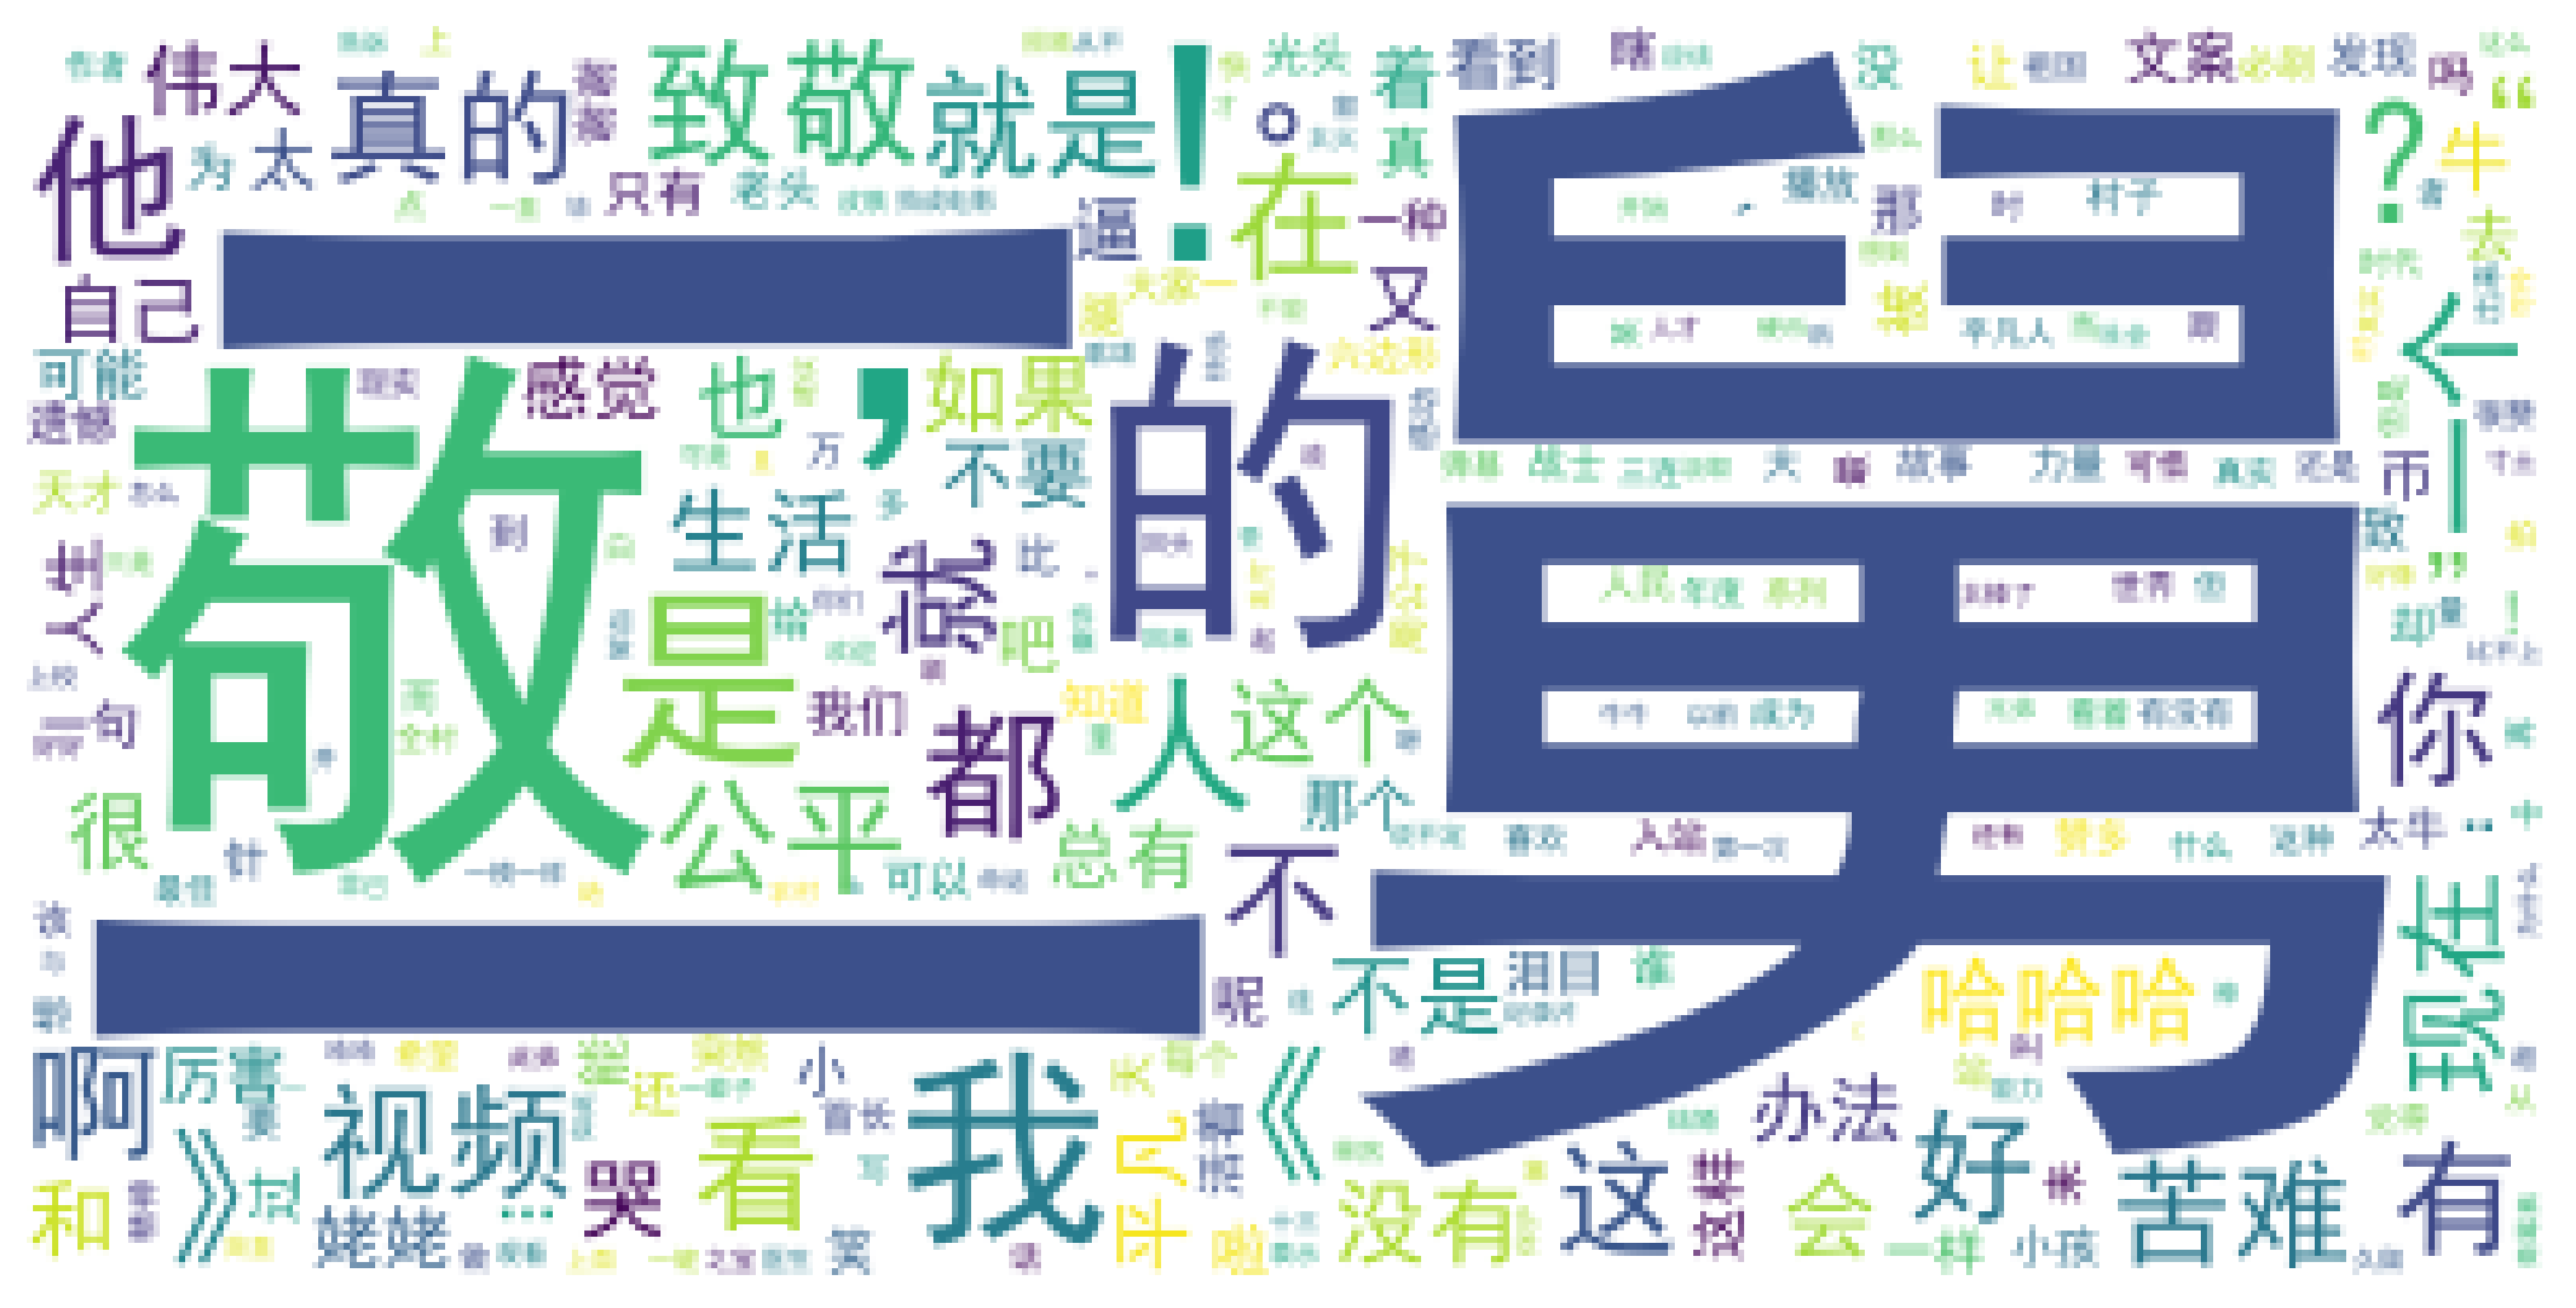

In [16]:
# 1 导入相关库
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from imageio import imread

import warnings
warnings.filterwarnings("ignore")

# 2 读取文本文件，并使用lcut()方法进行分词
with open("dan_mu.txt",encoding="utf-8") as f:
    txt = f.read()
txt = txt.split()
data_cut = [jieba.lcut(x) for x in txt]
data_cut
# 3 读取停用词
stop = [" ","道","说道","说",'了']
# 4 去掉停用词之后的最终词
s_data_cut = pd.Series(data_cut)
all_words_after = s_data_cut.apply(lambda x:[i for i in x if i not in stop])
# 5 词频统计
all_words = []
for i in all_words_after:
    all_words.extend(i)
word_count = pd.Series(all_words).value_counts()
# 6 词云图的绘制
# 1）读取背景图片


# 2）设置词云参数
wc = WordCloud(font_path="C:/Users/Windows/fonts/simhei.ttf",
               background_color="white",
               max_words=2000,
               max_font_size=200,
               random_state=42
              )
wc2 = wc.fit_words(word_count)

# 3）绘制词云图
plt.figure(figsize=(16,8), dpi=300)
plt.imshow(wc2)
plt.axis("off")
plt.show()
wc.to_file("ciyun.jpg")

